<a href="https://colab.research.google.com/github/GoncNeto/Data-Science/blob/master/TPC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets, tree, model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from sklearn import datasets
from sklearn import datasets, tree, model_selection
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection

from sklearn import datasets

# ----- Ponto 1 -----
# The digits dataset
digits = datasets.load_digits()

# Aula 7 - Decision Tree
[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(digits.data, digits.target, test_size=0.30)
model = tree.DecisionTreeClassifier()

clf = model.fit(features_train, classes_train)

score_train = model.score(features_train, classes_train)
score_test = model.score(features_test, classes_test)

print("Decision Tree")
print("Features:", digits.target_names)
print("score_train:", score_train)
print("score_test:", score_test)
print("\n")


# Aula 7 - Random Forest
model2 = RandomForestClassifier(n_estimators=1000)

clf = model2.fit(features_train, classes_train)

score_train = model2.score(features_train, classes_train)
score_test = model2.score(features_test, classes_test)

print("Random Forest")
print("score_train:", score_train)
print("score_test:", score_test)
print("\n")



# Aula 9 - Naive Bayes
gnb = GaussianNB()

y_pred = gnb.fit(features_train, classes_train)

score_train = gnb.score(features_train, classes_train)
score_test = gnb.score(features_test, classes_test)

print("Naive Bayes")
print("score_train:", score_train)
print("score_test:", score_test)
print("\n")

# ----- Ponto 2 ----- 
# Aula 6
S = np.arange(digits.data.shape[0])
np.random.shuffle(S)
index_train = S[:int(digits.data.shape[0]*0.8)]
index_test = S[int(digits.data.shape[0]*0.2):] # Stor mencionou na aula que dados de teste são 20%

print("Train: ",index_train.shape[0])
print("Test: ",index_test.shape[0])
print("------")

frame = np.concatenate([digits.data,digits.target.reshape(-1,1)], axis=1)
frame_train = frame[index_train,:]
frame_test = frame[index_test,:]


print("initial train data:")
print(frame_train.shape)
print("------")
print("initial test data:")
print(frame_test.shape)



Decision Tree
Features: [0 1 2 3 4 5 6 7 8 9]
score_train: 1.0
score_test: 0.8444444444444444


Random Forest
score_train: 1.0
score_test: 0.9796296296296296


Naive Bayes
score_train: 0.8337311058074781
score_test: 0.8148148148148148


Train:  1437
Test:  1438
------
initial train data:
(1437, 65)
------
initial test data:
(1438, 65)


**Ponto 3 - Test set de instâncias mal bem classificadas: **

Resultados mal classificados:
Atual:  [5 6 2 7 3 8 1 6 2 3 3 1 5 2 2 1 4 9 5 8 4 5 1 3 5 5 8 3 1 7 4 5 9 8 4 8 6
 9 1 3 6 9 8 9 3 1 5 2 2 6 8 7 8 3 9 4 1 8 2 4 1 4 5 3 4 1 8 1 1 8 8 4 5 2
 9 1 8 8 2 8 2 2 9 6]
Predição: [9 4 1 1 5 4 4 9 0 9 2 2 4 7 7 3 0 5 9 9 1 0 8 8 4 9 7 5 6 2 0 9 2 9 9 1 4
 3 9 9 4 3 2 3 7 3 8 3 8 4 9 9 7 6 2 1 2 5 5 9 3 7 6 9 5 0 9 8 4 4 1 6 9 7
 3 2 7 7 7 4 3 1 3 1]


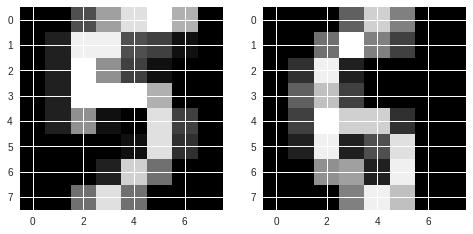


Resultados bem classificados:
Atual:  [5 6 2 7 3 8 1 6 2 3 3 1 5 2 2 1 4 9 5 8 4 5 1 3 5 5 8 3 1 7 4 5 9 8 4 8 6
 9 1 3 6 9 8 9 3 1 5 2 2 6 8 7 8 3 9 4 1 8 2 4 1 4 5 3 4 1 8 1 1 8 8 4 5 2
 9 1 8 8 2 8 2 2 9 6]
Predição: [9 4 1 1 5 4 4 9 0 9 2 2 4 7 7 3 0 5 9 9 1 0 8 8 4 9 7 5 6 2 0 9 2 9 9 1 4
 3 9 9 4 3 2 3 7 3 8 3 8 4 9 9 7 6 2 1 2 5 5 9 3 7 6 9 5 0 9 8 4 4 1 6 9 7
 3 2 7 7 7 4 3 1 3 1]


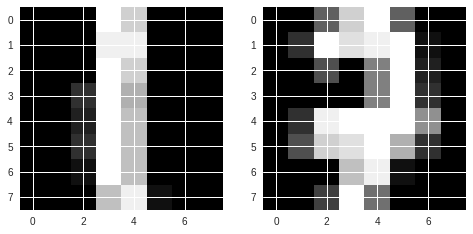

In [4]:
print("Resultados mal classificados:")
res = model.predict(features_test)
err_features=features_test[res!=classes_test,:][:2]
print("Atual: ",classes_test[res!=classes_test])
print("Predição:",res[res!=classes_test])

plt.figure()
for i,feat in enumerate(err_features):
    plt.subplot(1, 2, i+1)    
    plt.imshow(feat.reshape(8,8), cmap='gray')

plt.show()
print("")


ok_features=features_test[res==classes_test,:][:2]

print("Resultados bem classificados:")
print("Atual: ",classes_test[res!=classes_test])
print("Predição:",res[res!=classes_test])
plt.figure()
for i,feat in enumerate(ok_features):
    plt.subplot(1, 2, i+1)    
    plt.imshow(feat.reshape(8,8), cmap='gray')